In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset from a CSV file
file_path = '/Users/nitin/EECE 5644/project/main.csv'  # Update the path to your actual file location
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,total_amount,day,hour,trip_duration,trip_distance
0,22.7,0,0,19.800000,1.72
1,22.5,0,0,6.600000,1.80
2,34.3,0,0,17.916667,4.70
3,19.0,0,0,8.300000,1.40
4,19.3,0,0,6.100000,0.80


In [2]:
# Drop rows with any missing values
df.dropna(inplace=True)


In [3]:
# Remove rows with negative fare amounts
df = df[df['total_amount'] >= 0]

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score

# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'trip_distance', 'total_amount', and 'trip_duration'
df = remove_outliers(df, 'trip_distance')
df = remove_outliers(df, 'total_amount')
df = remove_outliers(df, 'trip_duration')



In [5]:
df.head()

,total_amount,day,hour,trip_duration,trip_distance
0,22.7,0,0,19.800000,1.72
1,22.5,0,0,6.600000,1.80
2,34.3,0,0,17.916667,4.70
3,19.0,0,0,8.300000,1.40
4,19.3,0,0,6.100000,0.80


In [7]:
# Define the number of samples to use for training
n_samples = 1000000  # Update this to the desired number of samples

# Take a random sample of the cleaned dataset
df = df.sample(n=n_samples, random_state=42)

# Define the features and target variable
features = ['day', 'hour', 'trip_duration', 'trip_distance']
target = 'total_amount'

standard_deviation = df['total_amount'].std
# Scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Define the features (X) and the target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Standard Deviation: {standard_deviation}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'MAPE: {mape}')
print(f'Median AE: {medae}')
print(f'Explained Variance: {explained_variance}')

MAE: 2.965637007990375
MSE: 15.159517424760507
RMSE: 3.8935224957306342
R²: 0.7243589422949326
MAPE: 0.15840388155901927
Median AE: 2.397433333333339
Explained Variance: 0.7244709864632718


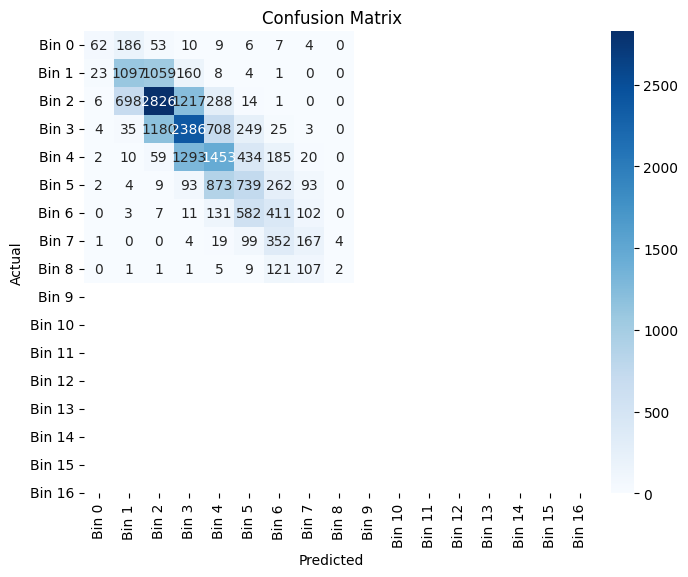

Precision: 0.45858887736681236
Accuracy: 0.45715
Recall: 0.45715
F1 Score: 0.4530059602967165


In [ ]:
import numpy as np
data_combined = np.concatenate([y_test, y_pred])

# Number of observations
n = len(data_combined)

# Sturges' Rule
sturges_bins = int(np.ceil(np.log2(n) + 1))
sqrt_bins = int(np.sqrt(n))

# Define the number of bins
num_bins = sturges_bins

# Create bins for the continuous data
bins = np.linspace(min(y_test + y_pred), max(y_test + y_pred), num_bins + 1)

# Digitize the continuous data into bins
y_test_binned = np.digitize(y_test, bins) - 1
y_pred_binned = np.digitize(y_pred, bins) - 1

# Compute the confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Display the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Bin {i}' for i in range(num_bins)], yticklabels=[f'Bin {i}' for i in range(num_bins)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute and print precision, accuracy, recall, and F1-score
precision = precision_score(y_test_binned, y_pred_binned, average='weighted')
accuracy = accuracy_score(y_test_binned, y_pred_binned)
recall = recall_score(y_test_binned, y_pred_binned, average='weighted')
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')

print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
